In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

653

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cebb9ee3c72434ec855275efbbf1ca8f


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nago
Processing Record 2 of Set 1 | grand gaube
Processing Record 3 of Set 1 | ternate
Processing Record 4 of Set 1 | ascension
Processing Record 5 of Set 1 | praia
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | puerto del rosario
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | coquimbo
Processing Record 10 of Set 1 | saint anthony
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | zhanatas
City not found. Skipping...
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | haibowan
City not found. Skipping...
Processing Record 17 of Set 1 | aksu
Processing Record 18 of Set 1 | petropavlovka
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | ponta do sol
Processing 

Processing Record 36 of Set 4 | horta
Processing Record 37 of Set 4 | tezu
Processing Record 38 of Set 4 | manggar
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | yanam
Processing Record 41 of Set 4 | tarauaca
Processing Record 42 of Set 4 | gat
Processing Record 43 of Set 4 | thunder bay
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | san carlos de bariloche
Processing Record 46 of Set 4 | waipawa
Processing Record 47 of Set 4 | olean
Processing Record 48 of Set 4 | bogatyye saby
Processing Record 49 of Set 4 | kijaba
City not found. Skipping...
Processing Record 50 of Set 4 | tawang
Processing Record 1 of Set 5 | upington
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | okhotsk
Processing Record 4 of Set 5 | nador
Processing Record 5 of Set 5 | svobodnyy
Processing Record 6 of Set 5 | vredefort
Processing Record 7 of Set 5 | exeter
Processing Record 8 of Set 5 | flinders
Processing Record 9 of Set 5 | maramba

Processing Record 24 of Set 8 | lerwick
Processing Record 25 of Set 8 | gobabis
Processing Record 26 of Set 8 | hamilton
Processing Record 27 of Set 8 | karachi
Processing Record 28 of Set 8 | narsaq
Processing Record 29 of Set 8 | saldanha
Processing Record 30 of Set 8 | saint-pierre
Processing Record 31 of Set 8 | maldonado
Processing Record 32 of Set 8 | kieta
Processing Record 33 of Set 8 | konstantinovka
Processing Record 34 of Set 8 | massakory
Processing Record 35 of Set 8 | faya
Processing Record 36 of Set 8 | bandarbeyla
Processing Record 37 of Set 8 | dujuma
City not found. Skipping...
Processing Record 38 of Set 8 | unidos
Processing Record 39 of Set 8 | lompoc
Processing Record 40 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 8 | maniitsoq
Processing Record 42 of Set 8 | bonavista
Processing Record 43 of Set 8 | laredo
Processing Record 44 of Set 8 | tual
Processing Record 45 of Set 8 | neiafu
Processing Record 46 of Set 8 | zhengjiatun
Pr

Processing Record 15 of Set 12 | darhan
Processing Record 16 of Set 12 | broome
Processing Record 17 of Set 12 | port moresby
Processing Record 18 of Set 12 | warqla
City not found. Skipping...
Processing Record 19 of Set 12 | kulaman
Processing Record 20 of Set 12 | belaya gora
Processing Record 21 of Set 12 | kutum
Processing Record 22 of Set 12 | bismarck
Processing Record 23 of Set 12 | santa lucia
Processing Record 24 of Set 12 | palafrugell
Processing Record 25 of Set 12 | gravdal
Processing Record 26 of Set 12 | newport
Processing Record 27 of Set 12 | bairiki
Processing Record 28 of Set 12 | joshimath
Processing Record 29 of Set 12 | evensk
Processing Record 30 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 31 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 32 of Set 12 | sioux lookout
Processing Record 33 of Set 12 | opaka
Processing Record 34 of Set 12 | bengkulu
Processing Record 35 of Set 12 | malwan
City not found. Skipping...
P

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nago,26.59,127.98,69.80,77,75,10.29,JP,2020-11-26 22:57:48
1,Grand Gaube,-20.01,57.66,75.00,73,78,11.01,MU,2020-11-26 22:57:48
2,Ternate,0.80,127.40,83.21,75,37,3.38,ID,2020-11-26 22:57:48
3,Ascension,30.22,-90.90,71.01,94,33,4.94,US,2020-11-26 22:57:48
4,Praia,14.92,-23.51,77.00,69,40,23.04,CV,2020-11-26 22:53:10
...,...,...,...,...,...,...,...,...,...
593,Komsomolskiy,40.43,71.72,28.40,86,91,2.24,UZ,2020-11-26 22:59:04
594,Solok,-0.79,100.66,70.74,88,100,1.41,ID,2020-11-26 22:59:04
595,Iskateley,67.68,53.15,20.01,97,100,10.89,RU,2020-11-26 22:59:04
596,Mandalgovi,45.76,106.27,2.35,90,0,8.84,MN,2020-11-26 22:59:04


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nago,JP,2020-11-26 22:57:48,26.59,127.98,69.80,77,75,10.29
1,Grand Gaube,MU,2020-11-26 22:57:48,-20.01,57.66,75.00,73,78,11.01
2,Ternate,ID,2020-11-26 22:57:48,0.80,127.40,83.21,75,37,3.38
3,Ascension,US,2020-11-26 22:57:48,30.22,-90.90,71.01,94,33,4.94
4,Praia,CV,2020-11-26 22:53:10,14.92,-23.51,77.00,69,40,23.04
...,...,...,...,...,...,...,...,...,...
593,Komsomolskiy,UZ,2020-11-26 22:59:04,40.43,71.72,28.40,86,91,2.24
594,Solok,ID,2020-11-26 22:59:04,-0.79,100.66,70.74,88,100,1.41
595,Iskateley,RU,2020-11-26 22:59:04,67.68,53.15,20.01,97,100,10.89
596,Mandalgovi,MN,2020-11-26 22:59:04,45.76,106.27,2.35,90,0,8.84


In [19]:
# Create the output file (CSV).
#output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'output_data_file' is not defined

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

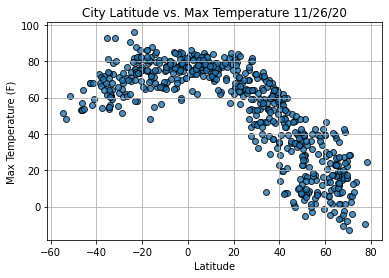

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

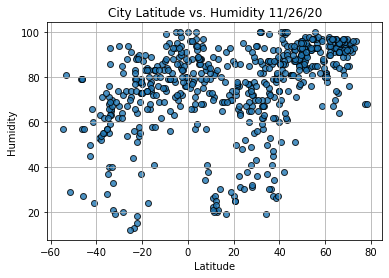

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

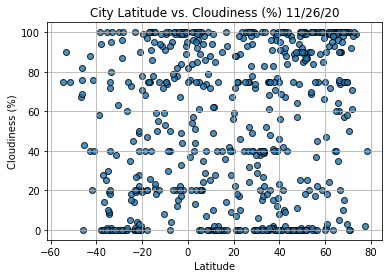

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

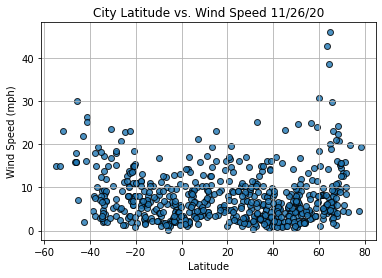

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2020-11-26 22:57:49
Lat                        -34.53
Lng                         20.04
Max Temp                     53.6
Humidity                       71
Cloudiness                     19
Wind Speed                    4.7
Name: 13, dtype: object

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

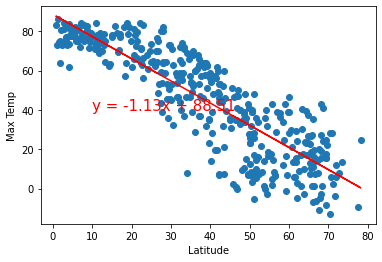

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

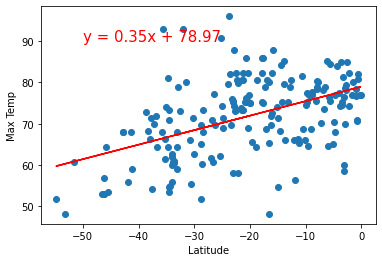

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


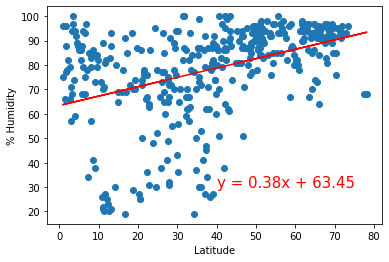

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,30))

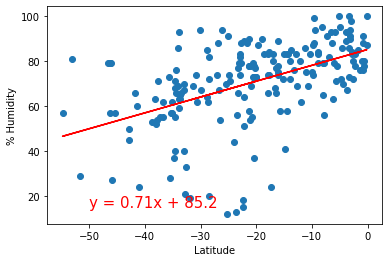

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

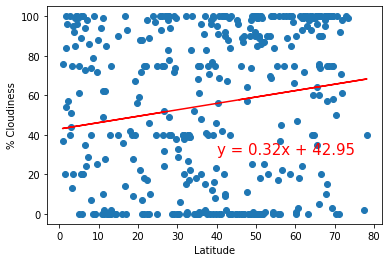

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,30))

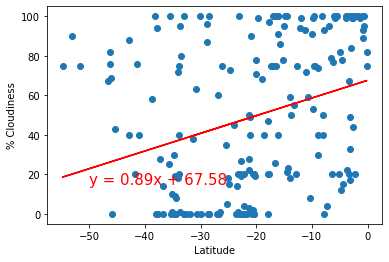

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

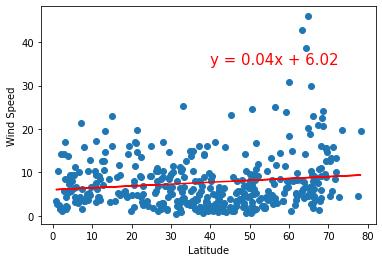

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

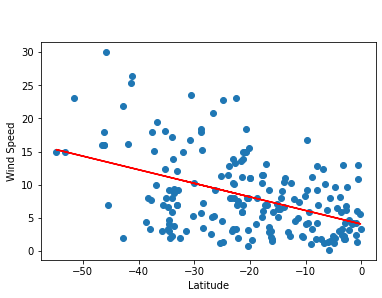

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))